In [5]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# code in this cell from: 
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

In [6]:
# switch to seaborn default stylistic parameters
sns.set()
sns.set_context('notebook') 

In [7]:
#read in data
df = pd.read_csv("C:/Users/urban boutique/Desktop/California.csv")

In [9]:
#remove commas from data and convert into int
df = df.replace(',','', regex=True)

df["Population"] = df["Population"].astype(str).astype(int)
df["Violent_crime"] = df["Violent_crime"].astype(str).astype(int)
df["Murder_manslaughter"] = df["Murder_manslaughter"].astype(str).astype(int)
df["Rape"] = df["Rape"].astype(str).astype(int)
df["Robbery"] = df["Robbery"].astype(str).astype(int)
df["Aggravated_assault"] = df["Aggravated_assault"].astype(str).astype(int)
df["Property_crime"] = df["Property_crime"].astype(str).astype(int)
df["Burglary"] = df["Burglary"].astype(str).astype(int)
df["Larceny_theft"] = df["Larceny_theft"].astype(str).astype(int)
df["Motor_Vehicle_theft"] = df["Motor_Vehicle_theft"].astype(str).astype(int)
df["Arson"] = df["Arson"].astype(str).astype(int)

In [10]:
#display data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   City                 457 non-null    object
 1   Population           457 non-null    int32 
 2   Violent_crime        457 non-null    int32 
 3   Murder_manslaughter  457 non-null    int32 
 4   Rape                 457 non-null    int32 
 5   Robbery              457 non-null    int32 
 6   Aggravated_assault   457 non-null    int32 
 7   Property_crime       457 non-null    int32 
 8   Burglary             457 non-null    int32 
 9   Larceny_theft        457 non-null    int32 
 10  Motor_Vehicle_theft  457 non-null    int32 
 11  Arson                457 non-null    int32 
dtypes: int32(11), object(1)
memory usage: 23.3+ KB


In [11]:
#display first 10 rows of data
df.head(10)

,City,Population,Violent_crime,Murder_manslaughter,Rape,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_Vehicle_theft,Arson
0,Adelanto,34491,276,1,20,42,213,459,136,209,114,14
1,Agoura Hills,20490,21,0,6,4,11,306,66,223,17,0
2,Alameda,78907,162,0,7,94,61,2579,218,1958,403,29
3,Albany,20083,40,0,8,21,11,685,105,534,46,1
4,Alhambra,84837,161,2,11,89,59,1749,259,1303,187,8
5,Aliso Viejo,52247,27,1,3,13,10,433,57,351,25,1
6,Alturas,2471,10,0,2,1,7,30,14,13,3,0
7,American Canyon,20452,53,0,7,7,39,454,59,368,27,3
8,Anaheim,353915,1120,8,141,396,575,8258,1123,5904,1231,44
9,Anderson,10545,61,1,5,12,43,363,63,208,92,1


In [12]:
# sort data by population from smallest to largest. Display the first 10 cities
df = df.sort_values(by='Population')
df.head(10)

,City,Population,Violent_crime,Murder_manslaughter,Rape,Robbery,Aggravated_assault,Property_crime,Burglary,Larceny_theft,Motor_Vehicle_theft,Arson
427,Vernon,112,27,0,1,12,14,485,133,272,80,5
186,Industry,201,72,0,1,41,30,1180,156,899,125,7
350,Sand City,407,9,0,0,2,7,77,4,70,3,0
142,Fort Jones,690,2,0,1,0,1,34,12,21,1,0
130,Etna,716,2,0,1,0,1,0,0,0,0,0
191,Isleton,849,7,1,0,0,6,4,1,2,1,0
112,Dorris,897,4,0,0,0,4,11,8,2,1,0
417,Tulelake,985,3,0,1,0,2,4,1,3,0,0
43,Bradbury,1089,1,0,0,1,0,10,2,6,2,0
136,Ferndale,1363,4,0,0,0,4,24,2,17,5,0


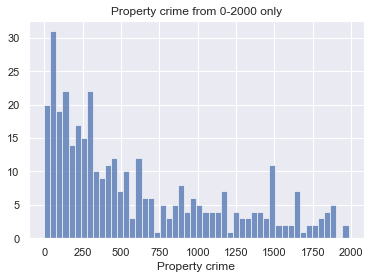

In [28]:
# A histogram showing Property_crime from 0 - 2000 only

data = df[df['Property_crime'].between(0,2000)]

h = sns.histplot(data=data,x=data['Property_crime'], bins=50)

h.set(title = 'Property crime from 0-2000 only', xlabel = 'Property crime', ylabel = '', xticks=np.arange(0,2250,250));


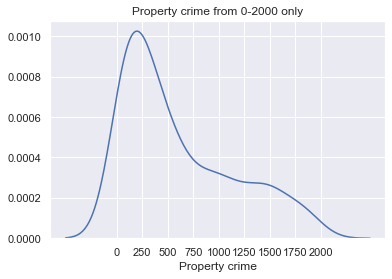

In [34]:
# A density plot showing Property_crime amounts from 0 - 2000

data = df[df['Property_crime'].between(0,2000)]
g = sns.kdeplot(data = data, x='Property_crime')
g.set(title = 'Property crime from 0-2000 only', xlabel = 'Property crime', ylabel = '', xticks=np.arange(0,2250,250));

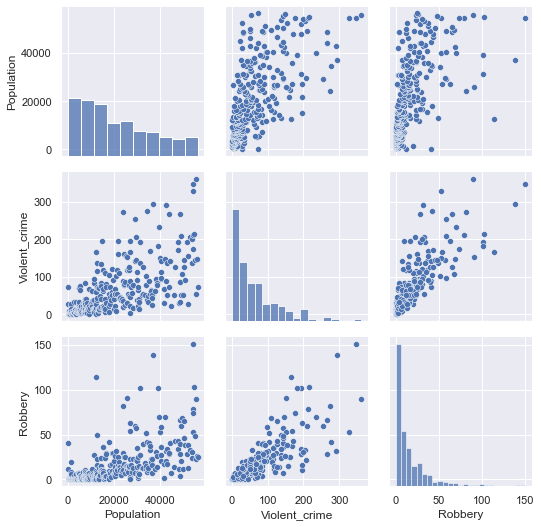

In [280]:
# A grid of scatterplots using only Population, Violent_crime, and Robbery

g = sns.PairGrid(df.loc[:,['Population','Violent_crime','Robbery']].head(300))
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

Text(0, 0.5, 'Property Crime')

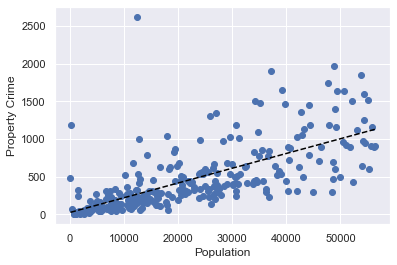

In [277]:
#Let's build a model to predict a citys property crime from its population.

# A scatterplot of Property_crime by Population (Property_crime on y axis),
# with linear model on it (as a line).

X = df["Population"].head(300)
y = df["Property_crime"].head(300)

plt.plot(X, y, 'o');

m, b = np.polyfit(X, y, 1)
plt.plot(X, m*X+b,color="black",linestyle="dashed")

plt.xlabel('Population')
plt.ylabel('Property Crime')

In [278]:
# The coefficients and R-squared value of the model.
X = np.array(X).reshape(-1,1)

reg = LinearRegression().fit(X,y)

print("intercept: " + format(reg.intercept_, ".2f"))
print("coefficient for Population: " + format(reg.coef_[0], ".2f"))
print("r-squared value: " + format(reg.score(X, y), ".2f"))

intercept: 24.88
coefficient for Population: 0.02
r-squared value: 0.50


In [62]:
# Three new linear models for Property_crime 

# Using predictors Population, Violent_crime, and Robbery.
X1 = df[["Population","Violent_crime","Robbery"]]
y1 = df["Property_crime"]

# Using predictors Population, Burglary, and Larceny_theft.
X2 = df[["Population","Burglary","Larceny_theft"]]
y2 = df["Property_crime"]

# Using predictors Population, Rape, and Murder_manslaughter.
X3 = df[["Population","Rape","Murder_manslaughter"]]
y3 = df["Property_crime"]

reg1 = LinearRegression().fit(X1,y1)
reg2 = LinearRegression().fit(X2,y2)
reg3 = LinearRegression().fit(X3,y3)

print("reg1:", reg1.get_params())
print("reg2:", reg2.get_params())
print("reg3:", reg3.get_params())

reg1: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
reg2: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
reg3: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


In [63]:
# Coefficients (including intercept) for the new models.

print("reg1")
print("intercept: " + format(reg1.intercept_, ".2f"))
print("coefficients:")
print(" Population: " + format(reg1.coef_[0], ".2f"))
print(" Violent crime: " + format(reg1.coef_[1], ".2f"))
print(" Robbery: " + format(reg1.coef_[2], ".2f"))
print("")

print("reg2")
print("intercept: " + format(reg2.intercept_, ".2f"))
print("coefficients:")
print(" Population: " + format(reg2.coef_[0], ".2f"))
print(" Burglary: " + format(reg2.coef_[1], ".2f"))
print(" Larceny_theft: " + format(reg2.coef_[2], ".2f"))
print("")

print("reg3")
print("intercept: " + format(reg3.intercept_, ".2f"))
print("coefficients:")
print(" Population: " + format(reg3.coef_[0], ".2f"))
print(" Rape: " + format(reg3.coef_[1], ".2f"))
print(" Murder_manslaughter: " + format(reg3.coef_[2], ".2f"))

reg1
intercept: 125.28
coefficients:
 Population: 0.02
 Violent crime: -4.59
 Robbery: 16.68

reg2
intercept: -39.36
coefficients:
 Population: 0.00
 Burglary: 1.56
 Larceny_theft: 1.03

reg3
intercept: 41.13
coefficients:
 Population: 0.02
 Rape: -11.48
 Murder_manslaughter: 171.49


In [65]:
# Compute the predicted Property_crime for the new model using different values for predictors

# a city with a population of 30,000, violent crime of 100, and robbery of 20.
X1new=[[30000,100,20]]
y1new=reg1.predict(X1new)
print(format(y1new[0], ".2f"))

# a city with a population of 30,000, burglary of 200, and larceny theft of 20.
X2new=[[30000,200,20]]
y2new=reg2.predict(X2new)
print(format(y2new[0], ".2f"))

# a city with a population of 30,000, rape of 3, and murder & manslaughter of 3.
X3new=[[30000,3,3]]
y3new=reg3.predict(X3new)
print(format(y3new[0], ".2f"))


554.80
338.54
1147.88


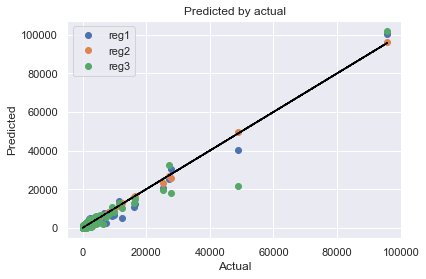

In [74]:
# Plot predicted values against actual values. In this case we plotted predicted Property_crime vs. actual Property_crime.
def plot_actual_predicted(actual, predicted, title, model):    
    plt.plot(actual,predicted,'o',label=model)
    plt.title(title)
    m, b = np.polyfit(actual, actual, 1)
    plt.plot(actual, m*actual+b,color='black', linestyle="dashed")
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()
    

predictors1 = ["Population","Violent_crime","Robbery"]
target1 = "Property_crime"
X1 = df[predictors1].values
y1 = df[target1].values

predictors2 = ["Population","Burglary","Larceny_theft"]
target2 = "Property_crime"
X2 = df[predictors2].values
y2 = df[target2].values
    
predictors3 = ["Population","Rape","Murder_manslaughter"]
target3 = "Property_crime"
X3 = df[predictors3].values
y3 = df[target3].values
    
plot_actual_predicted(y1, reg1.predict(X1), 'Predicted by actual', 'reg1')
plot_actual_predicted(y2, reg2.predict(X2), 'Predicted by actual', 'reg2')
plot_actual_predicted(y3, reg3.predict(X3), 'Predicted by actual', 'reg3')

In [ ]:
# The plot shows that our predictions are good for the most part. We actually fall short for reg2 and reg3 at around 50,000

In [76]:
# split the data of into separate training and set sets.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=0)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=0)

# fit the models using the training data
reg4 = LinearRegression()
reg4.fit(X1_train,y1_train)

reg5 = LinearRegression()
reg5.fit(X2_train,y2_train)

reg6 = LinearRegression()
reg6.fit(X3_train,y3_train)

print(reg4.get_params())
print(reg5.get_params())
print(reg6.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False, 'positive': False}


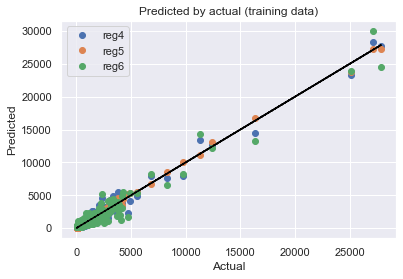

In [78]:
# Plot using the training data.

plot_actual_predicted(y1_train, reg4.predict(X1_train), 'Predicted by actual (training data)','reg4')
plot_actual_predicted(y2_train, reg5.predict(X2_train), 'Predicted by actual (training data)','reg5')
plot_actual_predicted(y3_train, reg6.predict(X3_train), 'Predicted by actual (training data)','reg6')

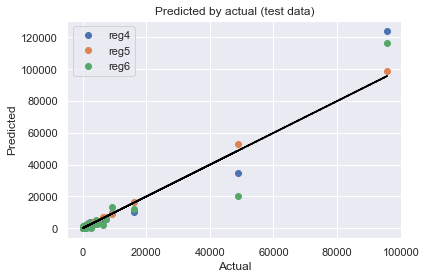

In [79]:
# Plot using the test data

plot_actual_predicted(y1_test, reg4.predict(X1_test), 'Predicted by actual (test data)', 'reg4')
plot_actual_predicted(y2_test, reg5.predict(X2_test), 'Predicted by actual (test data)', 'reg5')
plot_actual_predicted(y3_test, reg6.predict(X3_test), 'Predicted by actual (test data)', 'reg6')